# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: ZUHDI AZIZI
- Email: shineyvampire@gmail.com
- Id Dicoding: judddd

## Persiapan

### Menyiapkan library yang dibutuhkan

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

MELOAD DATA YANG DIBUTUHKAN

In [ ]:
df = pd.read_csv('data.csv')

MELIHAT STRUKTUR DAN ISI DATA

In [ ]:
df.head(5)

,Marital_status;Application_mode;Application_order;Course;Daytime_evening_attendance;Previous_qualification;Previous_qualification_grade;Nacionality;Mothers_qualification;Fathers_qualification;Mothers_occupation;Fathers_occupation;Admission_grade;Displaced;Educational_special_needs;Debtor;Tuition_fees_up_to_date;Gender;Scholarship_holder;Age_at_enrollment;International;Curricular_units_1st_sem_credited;Curricular_units_1st_sem_enrolled;Curricular_units_1st_sem_evaluations;Curricular_units_1st_sem_approved;Curricular_units_1st_sem_grade;Curricular_units_1st_sem_without_evaluations;Curricular_units_2nd_sem_credited;Curricular_units_2nd_sem_enrolled;Curricular_units_2nd_sem_evaluations;Curricular_units_2nd_sem_approved;Curricular_units_2nd_sem_grade;Curricular_units_2nd_sem_without_evaluations;Unemployment_rate;Inflation_rate;GDP;Status
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...


> Disini data dipisahkan dengan (;) bukan (,)

MENGUBAH KODE AGAR MEMBACA (;) SEBAGAI PEMISAH

In [ ]:
df = pd.read_csv('data.csv', sep=';')

In [ ]:
pd.set_option('display.max_columns', None)
df.head(2000000)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


> kita dapat melihat bahwa banyak kesalahan pada bagian Curricular_units_1st maupun Curricular_units_2st seperti evaluations(berarti mengikuti ujian) > 0 tapi grade = 0 tidak masuk akal,lalu ada evaluations > enrolled ini juga tidak logis

> Pada kolom Mothers/Fathers qualification dan Mothers/Fathers occupation,pada deskripsi ada nilai yang menunjukkan nilai blank atau unknown ini kita akan ganti nilai nya nanti

> untuk kolom lain masih terlihat aman

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
print(df.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [ ]:
print(df.duplicated().sum())

0


> SEJAUH INI DATA MASIH AMAN TIDAK ADA NILAI NULL ATAU DUPLICATE

In [ ]:
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


> Jika kita lihat langsung disini nilai nilai nya juga sudah tepat sesuai dengan deskripsi data,tidak ada kesalahan seperti outlier

In [ ]:
kolom_kategori = df.select_dtypes(include='object').columns
for col in kolom_kategori:
    print(f"\n{col}: {df[col].unique()}")


Status: ['Dropout' 'Graduate' 'Enrolled']


> Kolom kategori disini hanya ada pada bagian kolom status,yang akan kita ubah melalui encoding

## Data Preparation / Preprocessing

Ganti nilai Mothers/Fathers yang sudah dijelaskan diatas menjadi unknown

In [ ]:
invalid_values = {
    "Mothers_qualification": [34],
    "Fathers_qualification": [34],
    "Mothers_occupation": [99],
    "Fathers_occupation": [99]
}
for col, invalids in invalid_values.items():
    df[col] = df[col].replace(invalids, "Unknown")

Mengatasi kesalahan pada curricular units

In [ ]:
# Tandai nilai yang tidak valid
mask_invalid_sem1 = (df["Curricular_units_1st_sem_evaluations"] > 0) & \
                    (df["Curricular_units_1st_sem_grade"] == 0)
mask_invalid_sem2 = (df["Curricular_units_2nd_sem_evaluations"] > 0) & \
                    (df["Curricular_units_2nd_sem_grade"] == 0)

# Gabungkan dan hapus baris
invalid_rows = df[mask_invalid_sem1 | mask_invalid_sem2]
df = df.drop(invalid_rows.index).reset_index(drop=True)

In [ ]:
# Tandai baris di mana evaluations > enrolled pada semester 1 dan 2
invalid_sem1 = df["Curricular_units_1st_sem_evaluations"] > df["Curricular_units_1st_sem_enrolled"]
invalid_sem2 = df["Curricular_units_2nd_sem_evaluations"] > df["Curricular_units_2nd_sem_enrolled"]

# Gabungkan dan hapus baris
invalid_eval_rows = df[invalid_sem1 | invalid_sem2]
df = df.drop(invalid_eval_rows.index).reset_index(drop=True)

ENCODING

In [ ]:
status_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df["Status"] = df["Status"].map(status_mapping)

PENGECEKAN SAAT MENGGUNAKAN PROSES dimana nilai eval > enrolled

In [ ]:
pd.set_option('display.max_columns', None)
df.head(2000000)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,1,1,9500,1,1,136.0,1,19,38,9,9,119.3,1,0,0,1,0,1,18,0,0,8,8,7,13.214286,0,0,8,8,7,13.214286,0,12.7,3.7,-1.70,2
4,1,1,3,171,1,1,122.0,1,1,1,9,8,120.3,0,0,0,1,0,1,21,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,11.1,0.6,2.02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2,43,1,9147,1,2,120.0,1,37,37,9,9,122.8,0,0,1,0,0,0,42,0,13,13,13,13,11.923077,0,12,12,12,12,12.500000,0,15.5,2.8,-4.06,0
1020,1,1,4,9500,1,1,168.0,1,38,1,9,10,166.0,1,0,0,1,0,0,18,0,0,8,8,8,14.888750,0,0,8,8,8,14.888750,0,9.4,-0.8,-3.12,2
1021,1,1,4,9500,1,1,160.0,1,37,37,7,7,133.0,1,0,0,1,1,1,18,0,0,8,8,7,14.314286,0,0,8,8,7,14.314286,0,12.7,3.7,-1.70,2
1022,1,1,1,9070,1,1,132.0,1,1,1,9,9,133.8,1,0,0,1,0,1,20,0,0,6,6,6,13.833333,0,0,6,6,6,13.500000,0,16.2,0.3,-0.92,2


> seperti yang kita lihat bahwa data berkurang drastis maka dari itu kita akan menghilangkan proses dimana nilai eval > enrolled

PENGECEKAN (NEW)

In [ ]:
pd.set_option('display.max_columns', None)
df.head(2000000)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
3869,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3870,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3871,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


> Disini data tidak berkurang drastis

### EDA

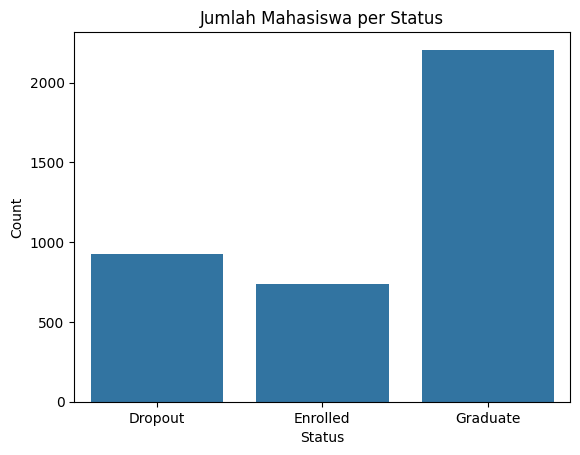

In [ ]:
sns.countplot(data=df, x="Status")
plt.xticks(ticks=[0, 1, 2], labels=['Dropout', 'Enrolled', 'Graduate'])

plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Jumlah Mahasiswa per Status")
plt.show()

> Terjadi imbalanced data dimana Graduate memiliki lebih banyak nilai daripada kategori lain

HEATMAP KORELASI ANTARA KOLOM LAIN DENGAN KOLOM STATUS

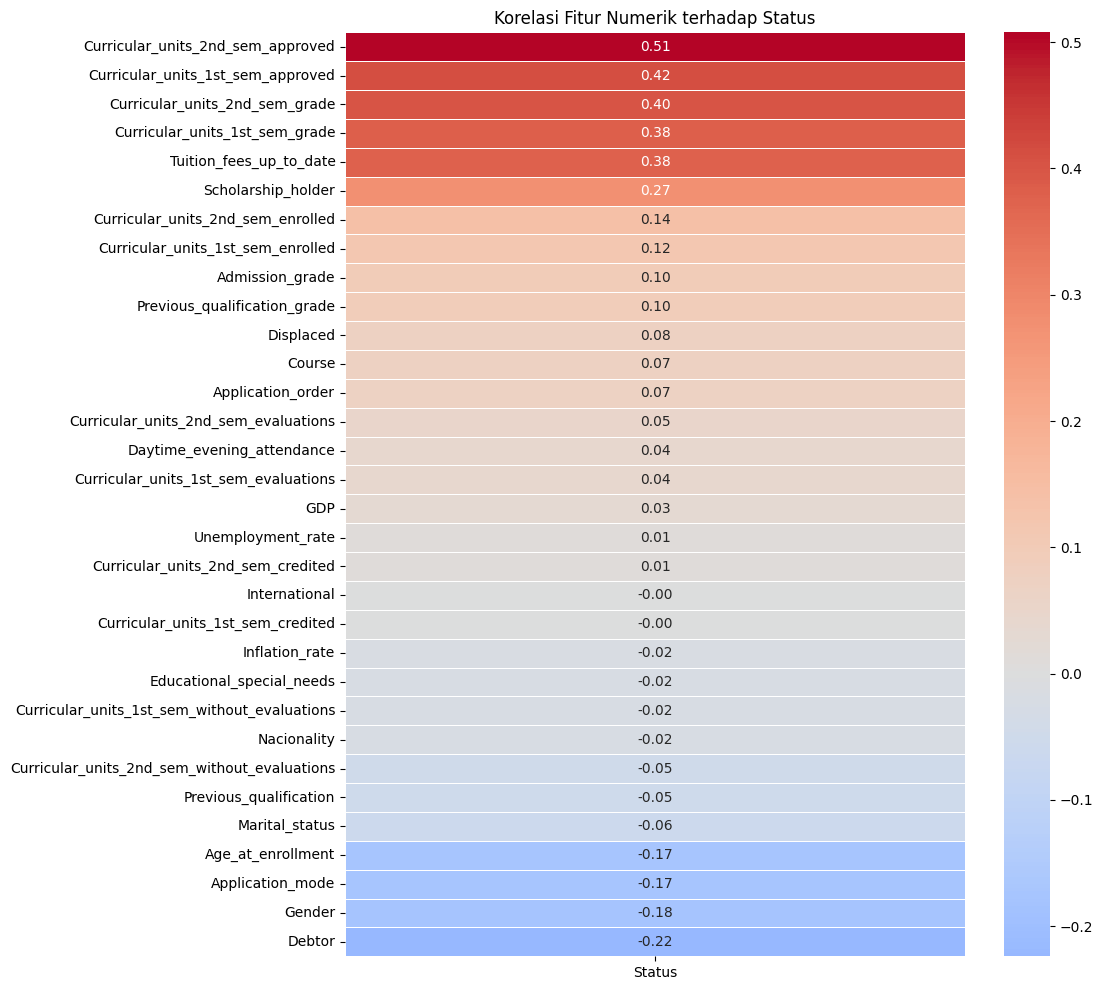

In [ ]:
# Ambil hanya kolom numerik
df_numeric = df.select_dtypes(include=["int64", "float64"])

# Korelasi dengan Status (sebagai target)
focused_corr = df_numeric.corr()["Status"].drop("Status").sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.heatmap(focused_corr.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, center=0)
plt.title("Korelasi Fitur Numerik terhadap Status")
plt.show()


> FITUR DENGAN THRESOLD LEBIH DARI 0.2 MENUNJUKKAN BAHWA FITUR INI LEBIH CENDERUNG MENGHASILKAN GRADUATE,SEDANGKAN FITUR DENGAN KORELASI NEGATIF DIBAWAH -0.15 LEBIH CENDERUNG DROPOUT

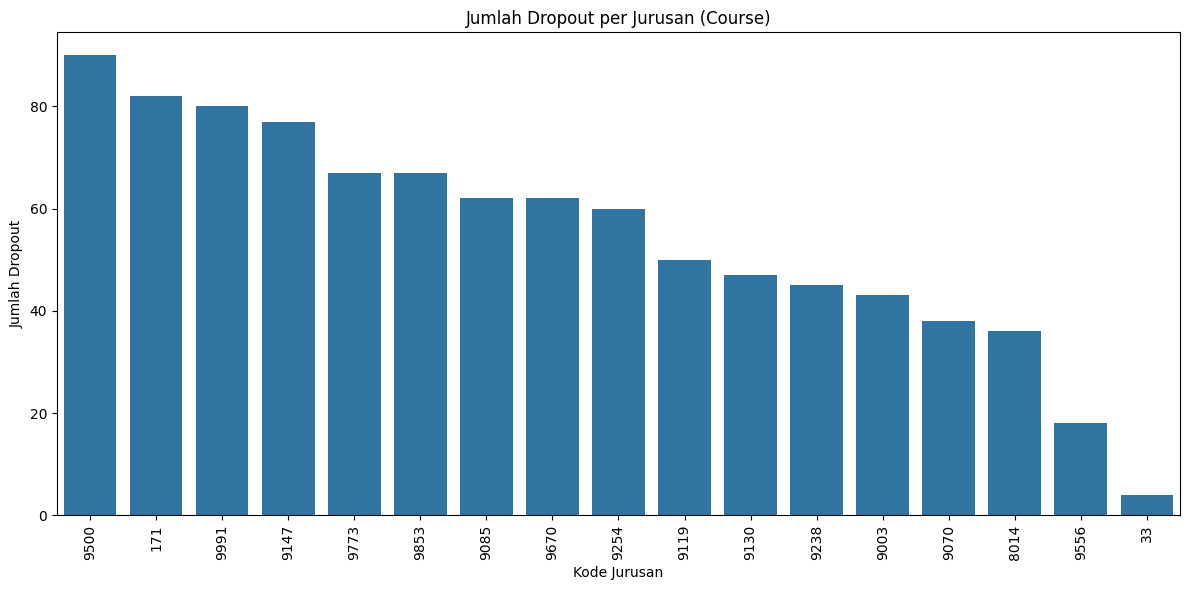

In [ ]:
df_eda = df.copy()

status_label = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}
df_eda["Status_Label"] = df_eda["Status"].map(status_label)

plt.figure(figsize=(12, 6))
dropout_per_course = df_eda[df_eda["Status"] == 0]["Course"].value_counts().sort_values(ascending=False)
sns.barplot(x=dropout_per_course.index.astype(str), y=dropout_per_course.values)
plt.xticks(rotation=90)
plt.title("Jumlah Dropout per Jurusan (Course)")
plt.xlabel("Kode Jurusan")
plt.ylabel("Jumlah Dropout")
plt.tight_layout()
plt.show()

> walaupun course tidak termasuk angka dengan thresold memengaruhi status,kita akan tetap melakukakan analisis disini.
> seperti yang kita lihat jurusan dengan kode 9500 - Nursing dan 171 - Animation and Multimedia Design Memiliki jumlah mahasiswa dropout yang lebih tinggi

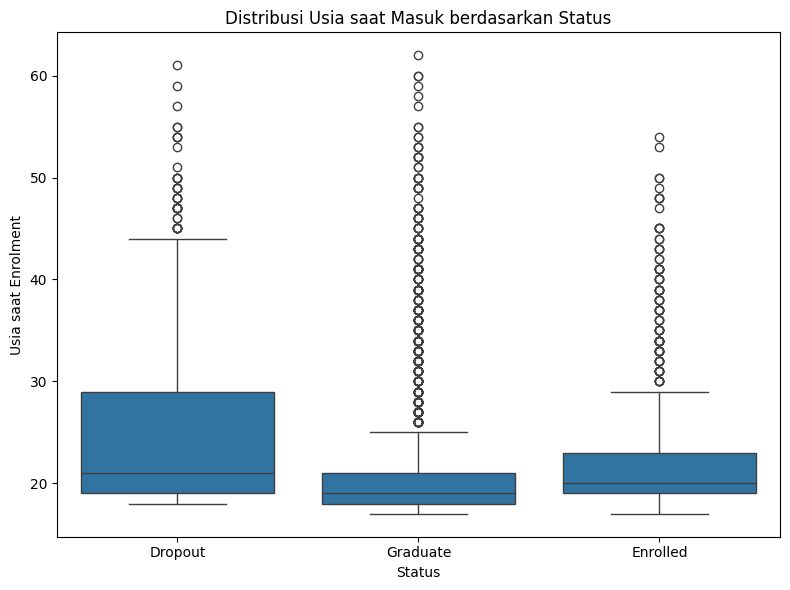

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_eda, x="Status_Label", y="Age_at_enrollment")
plt.title("Distribusi Usia saat Masuk berdasarkan Status")
plt.xlabel("Status")
plt.ylabel("Usia saat Enrolment")
plt.tight_layout()
plt.show()

>Mahasiswa Dropout memiliki rata-rata usia masuk lebih tinggi dibandingkan Graduate.

>Outlier usia > 40 lebih banyak pada kelompok dropout.

>Mahasiswa yang lulus cenderung masuk kuliah di usia 18–21 tahun.

>Usia masuk merupakan faktor risiko dropout.

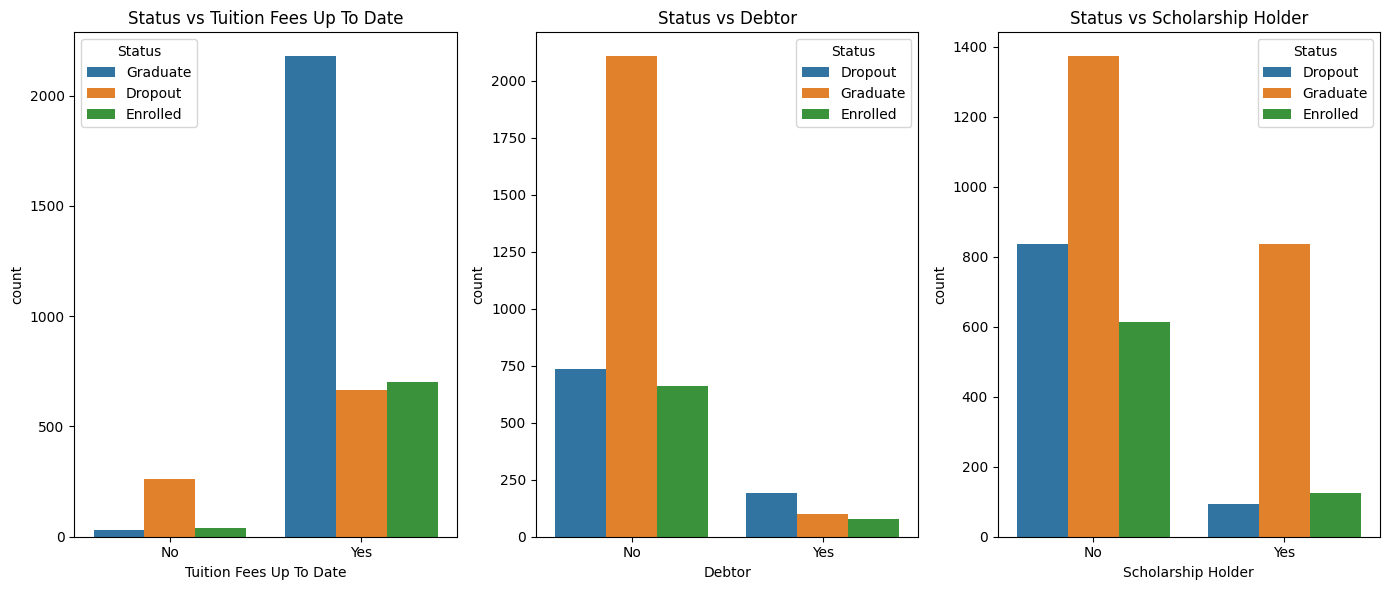

In [ ]:
plt.figure(figsize=(14, 6))

# a. Tuition Fees
plt.subplot(1, 3, 1)
sns.countplot(data=df_eda, x="Tuition_fees_up_to_date", hue="Status_Label")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title("Status vs Tuition Fees Up To Date")
plt.xlabel("Tuition Fees Up To Date")
plt.legend(title="Status")

# b. Debtor
plt.subplot(1, 3, 2)
sns.countplot(data=df_eda, x="Debtor", hue="Status_Label")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title("Status vs Debtor")
plt.xlabel("Debtor")
plt.legend(title="Status")

# c. Scholarship Holder
plt.subplot(1, 3, 3)
sns.countplot(data=df_eda, x="Scholarship_holder", hue="Status_Label")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title("Status vs Scholarship Holder")
plt.xlabel("Scholarship Holder")
plt.legend(title="Status")

plt.tight_layout()
plt.show()


> Tuition fees up to date > Mahasiswa yang membayar tepat waktu lebih banyak lulus. Menunggak = dropout

> Debtor > Debtor (utang/tunggakan) = lebih banyak dropout.  

> Scholarship holder > Penerima beasiswa cenderung lebih banyak graduate dan lebih sedikit dropout


MEMILIH FITUR

In [ ]:
correlation = df.corr(numeric_only=True)['Status'].sort_values(ascending=False)
fitur_pilih = correlation[(correlation >= 0.2) | (correlation <= -0.15)].drop(labels=['Status'], errors='ignore').index.tolist()
fitur_pilih

['Curricular_units_2nd_sem_approved',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_1st_sem_grade',
 'Tuition_fees_up_to_date',
 'Scholarship_holder',
 'Age_at_enrollment',
 'Application_mode',
 'Gender',
 'Debtor']

MENGAMBIL FITUR YANG MEMILIKI KORELASI >= 0.2 (positif) atau <= -0.15 (negatif)

### SAMPLING

In [ ]:
X = df[fitur_pilih]
y = df['Status']

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

MENGGUNAKAN SMOTE UNTUK MENGATASI IMBALANCED DATA

### SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

## Modeling

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Evaluation

In [ ]:
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[356  38  47]
 [ 24 351  67]
 [ 31  57 354]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       441
           1       0.79      0.79      0.79       442
           2       0.76      0.80      0.78       442

    accuracy                           0.80      1325
   macro avg       0.80      0.80      0.80      1325
weighted avg       0.80      0.80      0.80      1325



In [ ]:
print("Training Report:")
print(classification_report(y_train, rf_model.predict(X_train)))

print("Testing Report:")
print(classification_report(y_test, rf_model.predict(X_test)))

Training Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1766
           1       0.99      0.99      0.99      1765
           2       1.00      0.98      0.99      1765

    accuracy                           0.98      5296
   macro avg       0.99      0.98      0.98      5296
weighted avg       0.99      0.98      0.98      5296

Testing Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       441
           1       0.79      0.79      0.79       442
           2       0.76      0.80      0.78       442

    accuracy                           0.80      1325
   macro avg       0.80      0.80      0.80      1325
weighted avg       0.80      0.80      0.80      1325



> HASIL MODEL SUDAH CUKUP BAGUS WALAUPUN MASIH BINGUNG DALAM MEMBEDAKAN ENROLLED DAN GRADUATE

MENYIMPAN MODEL

In [ ]:
joblib.dump(rf_model, 'model.pkl')

['model.pkl']

In [ ]:
df.to_csv('dataakhir.csv', index=False)